# Predicting Booking Cancelation

#### Machine Learning for Marketing
2021

## Dataset Description

- <b>hotel:</b> hotel location
- <b>is_canceled:</b> [prediction variable] if the booking was or not is_canceled
- <b>lead_time:</b>
- <b>arrival_date_year:</b> year of the arrival
- <b>arrival_date_month:</b> month of the arrival
- <b>arrival_date_week_number</b> week number of the arrival (1 to 53)
- <b>arrival_date_day_of_month:</b> day of the month of the arrival
- <b>stays_in_weekend_nights:</b>
- <b>stays_in_week_nights</b>
- <b>adults:</b> total of adult guests
- <b>children:</b> total of children guests
- <b>babies:</b> total of babies guests
- <b>meal:</b> type of meals included in the booking (SC and undefined to no meal selected)
- <b>country:</b> coutntry of the guest origin
- <b>market_segment:</b> Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- <b></b>
- <b></b>
- <b></b>
- <b></b>
- <b></b>
- <b></b>
- <b></b>
- <b></b>
- <b></b>

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data 
df = pd.read_csv('hotel_bookings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7ec6fba10>,
      dtype=object)

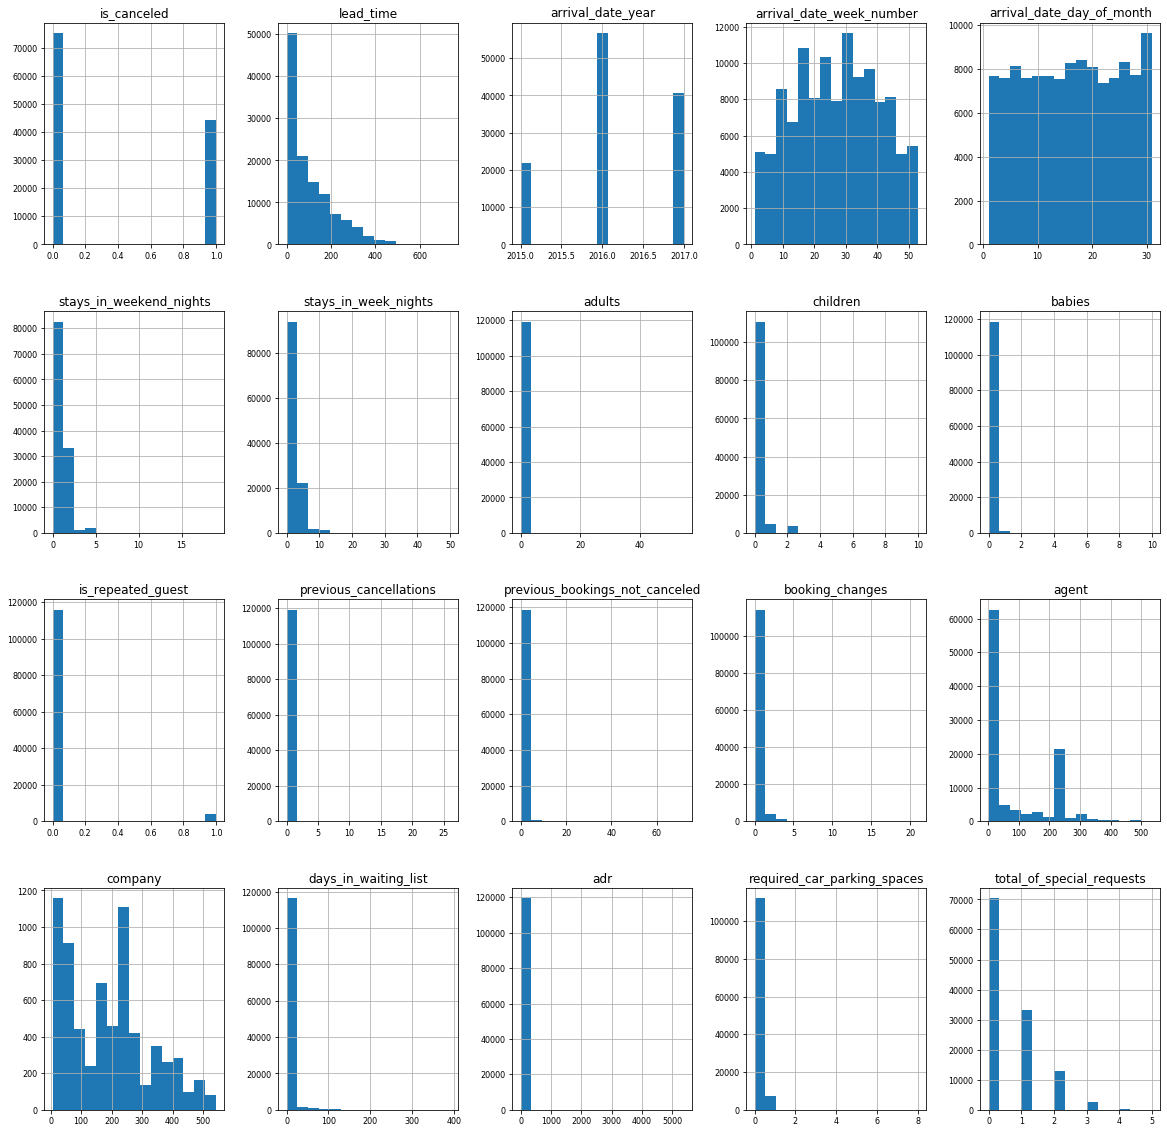

In [13]:
# Do histograms on all numeric variables
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(20, 20), layout=(4, 5), xlabelsize=8, ylabelsize=8)

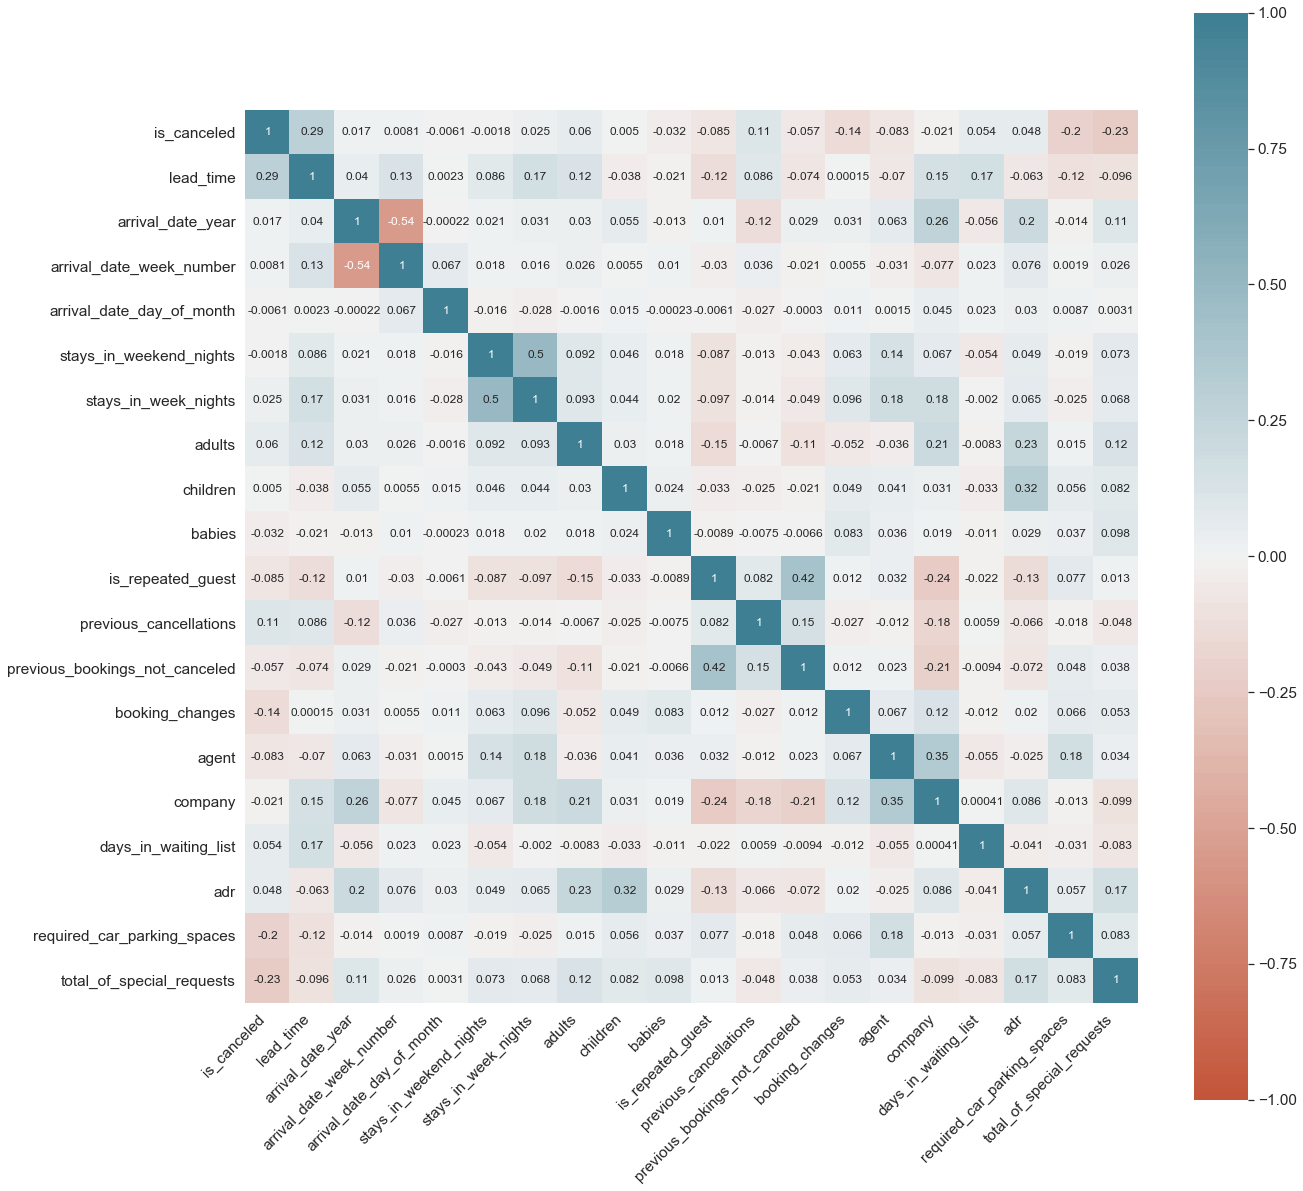

In [16]:
# Plot correlation heatmap of all numeric variables
corr = df[numerical].corr()
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size": 12}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Quick Modeling to Check Results

In [17]:
X = df.copy(deep=True)

In [18]:
y = X["is_canceled"]